In [ ]:
## In case you don't have Latex on your end environment, we suggest you to use colab and uncomment the following lines

# !apt install cm-super -q

# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
# ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
# ! unzip type1cm.zip -d /tmp/type1cm
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
# ! sudo texhash

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['pdf.fonttype'] = 42
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"


In [2]:
cost_jellyfish = (19.22 / (26721 * 8 * 3600) * 1000)
'{:f}'.format(cost_jellyfish)

'0.000025'

In [3]:
cost_mixtral = (19.22 / (2108 * 4 * 3600) * 1000)
cost_mixtral

0.0006331699346405228

In [4]:
cost_solar = (19.22 / (752 * 2 * 3600) * 1000)
cost_solar

0.0035497931442080377

In [5]:
cost_beluga2 = (19.22 / (1079 * 2 * 3600) * 1000)
cost_beluga2

0.0024739985583359073

In [6]:
cost_solar = 0.0009
cost_beluga2 = 0.0009

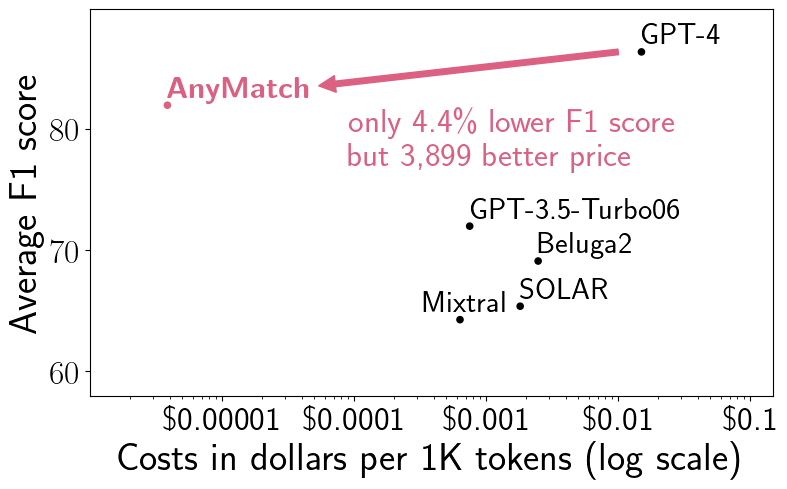

In [11]:
#params = np.array([56000, 70000, 70000, 175000, 1000000, 124]) * 10**6
f1_scores = np.array([64.26, 65.37, 69.10, 71.98, 86.36, 81.96])

cost_mixtral = (19.22 / (2108 * 4 * 3600) * 1000)
cost_solar = (19.22 / (1476 * 2 * 3600) * 1000)
cost_beluga2 = (19.22 / (1079 * 2 * 3600) * 1000)

costs = np.array([cost_mixtral, cost_solar, cost_beluga2, 0.00075, 0.015, 0.00000384646])


names = ['Mixtral', 'SOLAR', 'Beluga2', 'GPT-3.5-Turbo06', 'GPT-4', r'\textbf{AnyMatch}']
colors = ['black', 'black', 'black', 'black', 'black', '#dc6082']

ax = plt.gca()

for i, name in enumerate(names):
    color = 'black'#'#666666'
    if 'AnyMatch' in name:
        color = '#dc6082'
        

    x_extra = 0
    if 'Mixtral' in name:
        x_extra = -0.0003
    
    ax.annotate(name, (costs[i] + x_extra, f1_scores[i] + 0.7), fontsize=22, color=color)

plt.scatter(costs, f1_scores, edgecolor=colors, color=colors, s=20)

#plt.plot([costs[5] + 0.00003, costs[4] - 0.01], [f1_scores[5] + 1.6, f1_scores[4]], linestyle='-', color='green')
plt.annotate('', xytext=(costs[4] - 0.005, f1_scores[4]), xy=(costs[5] + 0.00005, f1_scores[5] + 1.6), arrowprops={'color': '#dc6082'})
plt.text(0.00009, 77, 'only 4.4\% lower F1 score\nbut 3,899 better price', color='#dc6082', fontsize='24')

plt.ylabel("Average F1 score", fontsize=28)
plt.ylim((58, 89.9))

plt.xlabel('Costs in dollars per 1K tokens (log scale)', fontsize=28)
plt.xscale('log')
plt.xlim((10**-6, 0.15))

ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
ax.set_xticklabels(['\$0.00001', '\$0.0001', '\$0.001', '\$0.01', '\$0.1'])



plt.gcf().set_size_inches(8, 5)
plt.tight_layout()
plt.gcf().savefig(f'../figures/f1-vs-cost.pdf', dpi=300)
plt.show()



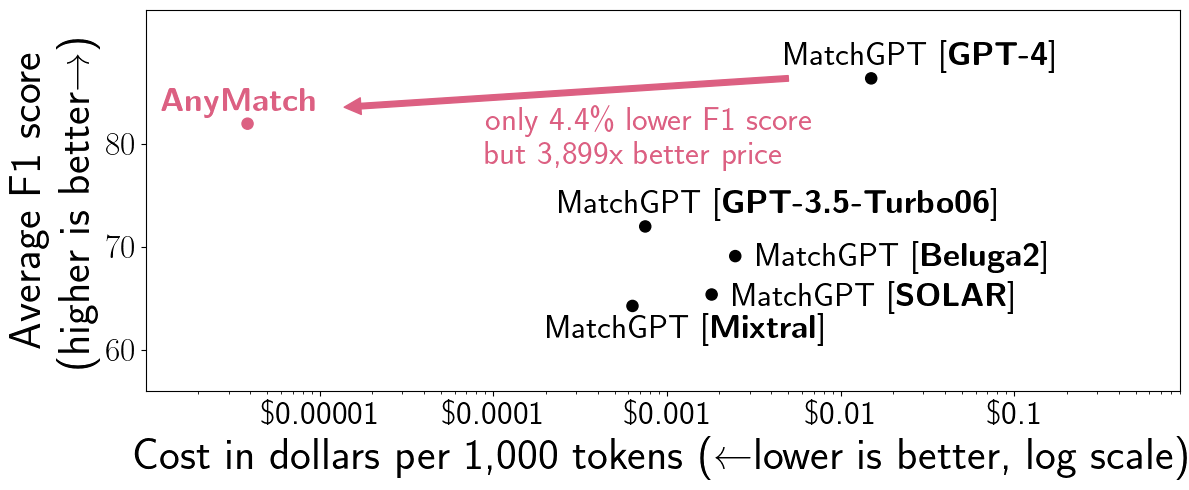

In [12]:
#params = np.array([56000, 70000, 70000, 175000, 1000000, 124]) * 10**6
f1_scores = np.array([64.26, 65.37, 69.10, 71.98, 86.36, 81.96])

cost_mixtral = (19.22 / (2108 * 4 * 3600) * 1000)
cost_solar = (19.22 / (1476 * 2 * 3600) * 1000)
cost_beluga2 = (19.22 / (1079 * 2 * 3600) * 1000)

costs = np.array([cost_mixtral, cost_solar, cost_beluga2, 0.00075, 0.015, 0.00000384646])


names = [r'MatchGPT [\textbf{Mixtral}]', r'MatchGPT [\textbf{SOLAR}]', r'MatchGPT [\textbf{Beluga2}]', r'MatchGPT [\textbf{GPT-3.5-Turbo06}]', r'MatchGPT [\textbf{GPT-4}]', r'\textbf{AnyMatch}']
colors = ['black', 'black', 'black', 'black', 'black', '#dc6082']

ax = plt.gca()

for i, name in enumerate(names):
    color = 'black'#'#666666'
    if 'AnyMatch' in name:
        color = '#dc6082'

    x_extra = - 0.5
    y_extra = 1.2

    if 'SOLAR' in name:
        x_extra = 0.12
        y_extra = -1.2

    if 'Beluga' in name:
        x_extra = 0.12
        y_extra = -1.0
    
    if 'Mixtral' in name:
        y_extra = -3.2
    
    x_pos = 10**(np.log10(costs[i]) + x_extra)
    y_pos = f1_scores[i] + y_extra



    
    ax.annotate(name, (x_pos, y_pos), fontsize=24, color=color)

plt.scatter(costs, f1_scores, edgecolor=colors, color=colors, s=64)

plt.annotate('', xytext=(costs[4] - 0.01, f1_scores[4]), xy=(costs[5] + 0.00001, f1_scores[5] + 1.6), arrowprops={'color': '#dc6082'})
plt.text(0.00009, 78, 'only 4.4\% lower F1 score\nbut 3,899x better price', color='#dc6082', fontsize='24')

plt.ylabel("Average F1 score\n(higher is better→)", fontsize=32)
plt.ylim((56, 93))

plt.xlabel('Cost in dollars per 1,000 tokens (←lower is better, log scale)', fontsize=32)
plt.xscale('log')
plt.xlim((10**-6, 0.9))

ax.tick_params(axis='both', which='major', labelsize=24)
ax.set_xticks([10**-5, 10**-4, 10**-3, 10**-2, 10**-1])
ax.set_xticklabels(['\$0.00001', '\$0.0001', '\$0.001', '\$0.01', '\$0.1'])
ax.set_yticks([60, 70, 80])


plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.gcf().savefig(f'../figures/teaser.pdf', dpi=300)
plt.show()